In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [9]:
df = pd.read_csv("Company_Data.csv")

In [10]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [11]:
df1=pd.Series(df['Sales'])
s=[]
for i in df1:
    if i>9:
        s.append('good')
    
    else:
        s.append('bad')
print(s)

['good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad'

In [12]:
df2=pd.DataFrame(s)
df3=pd.concat([df2,df],axis=1)
df3=df3.rename({0:'o/p'},axis=1)
df3

,o/p,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,good,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,good,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,good,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,bad,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,bad,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,good,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,bad,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,bad,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,bad,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df3.iloc[:, 7] = labelencoder.fit_transform(df3.iloc[:,7])
df3.iloc[:,10]=labelencoder.fit_transform(df3.iloc[:,10])
df3.iloc[:,11]=labelencoder.fit_transform(df3.iloc[:,11])
df3.iloc[:,0]=labelencoder.fit_transform(df3.iloc[:,0])

In [14]:
df3

,o/p,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,0,42,17,1,1
1,1,11.22,111,48,16,260,83,1,65,10,1,1
2,1,10.06,113,35,10,269,80,2,59,12,1,1
3,0,7.40,117,100,4,466,97,2,55,14,1,1
4,0,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,12.57,138,108,17,203,128,1,33,14,1,1
396,0,6.14,139,23,3,37,120,2,55,11,0,1
397,0,7.41,162,26,12,368,159,2,40,18,1,1
398,0,5.94,100,79,7,284,95,0,50,12,1,1


In [15]:
array=df3.values

In [48]:
X=array[:,0:10]
Y=array[:,0]

In [49]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40) 

In [50]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

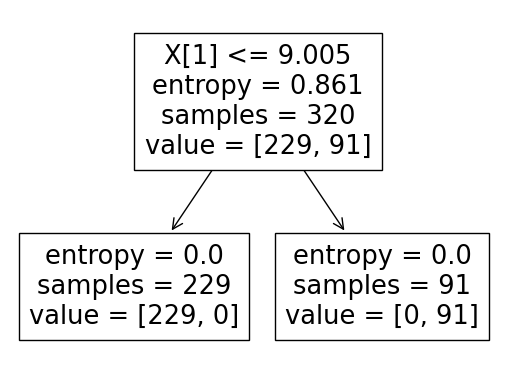

In [51]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

In [52]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

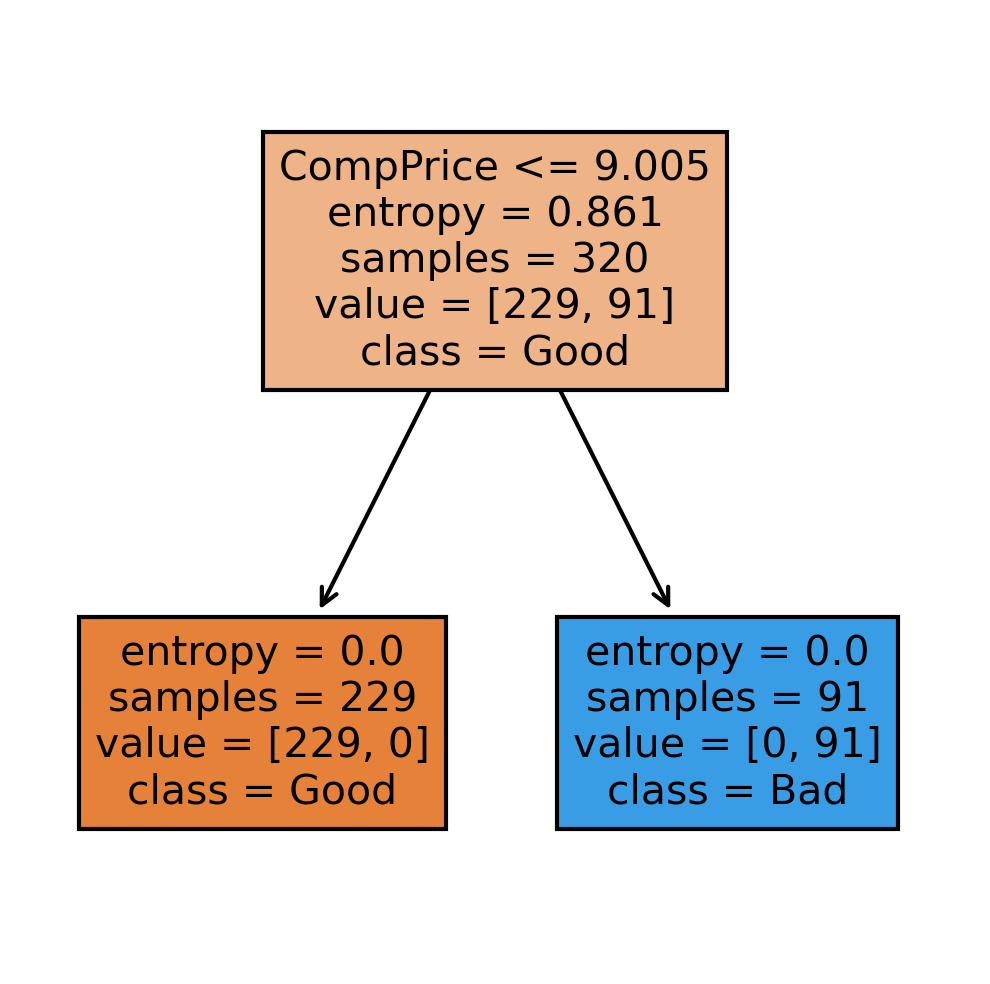

In [53]:

import matplotlib.pyplot as plt
fn=['ShelveLoc','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban','US']
cn=['Good', 'Bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [54]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_1 <= 9.01
|   |--- class: 0.0
|--- feature_1 >  9.01
|   |--- class: 1.0



In [55]:
model.feature_importances_ 

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

CompPrice      1.0
ShelveLoc      0.0
Income         0.0
Advertising    0.0
Population     0.0
Price          0.0
Age            0.0
Education      0.0
Urban          0.0
US             0.0
dtype: float64

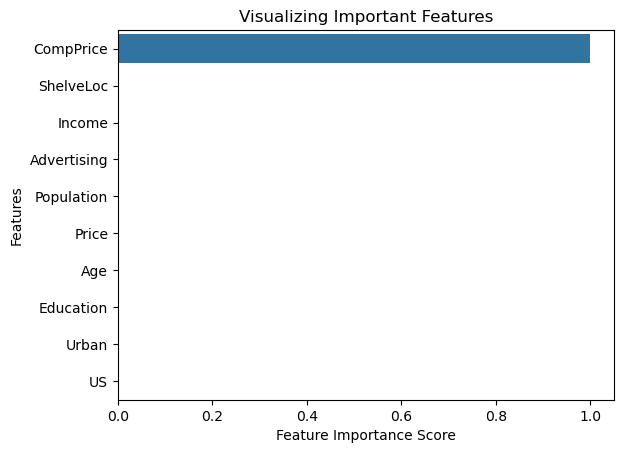

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [58]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0.0    58
1.0    22
dtype: int64

In [59]:
preds

array([1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [60]:
pd.crosstab(y_test,preds) 

col_0,0.0,1.0
row_0,,
0.0,58,0
1.0,0,22


In [62]:
# Accuracy 
import numpy as np
np.mean(preds==y_test)

1.0

In [63]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [64]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [65]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

1.0

In [66]:
model.feature_importances_ 

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [67]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor  

In [76]:
X=array[:,0:3]
Y=array[:,0]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)    

DecisionTreeRegressor(max_depth=3)

In [79]:
#Find the testing accuracy
model.score(X_test,y_test)     

-0.08140301003067263

In [80]:
#Find the training accuracy
model.score(X_train, y_train)  

0.23768998912365258